In [1]:
import ast 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
from matplotlib.ticker import FuncFormatter
#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#print("All imports successful!")

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # to change job skill list into data type

In [3]:
#only get data analyst job
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#Drop NaN Values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

476137    222500.0
286562    100000.0
221360     65000.0
517267     60000.0
694731    115000.0
257158     73000.0
149364    115000.0
465492     90000.0
304941    115000.0
52643     100700.0
Name: salary_year_avg, dtype: float64

<Axes: >

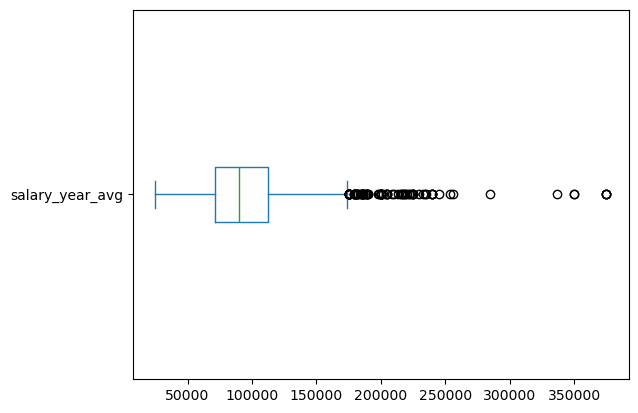

In [5]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

C:\Users\menbe\AppData\Local\Temp\ipykernel_31820\3244408879.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False )


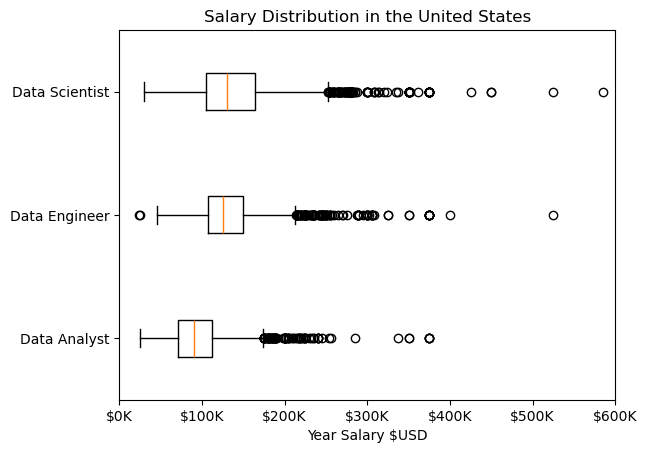

In [12]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']

#filter the data to appropriate job_title
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title] ['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False )
plt.title('Salary Distribution in the United States')
plt.xlabel('Year Salary $USD')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()